In [1]:
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline
df = pd.read_csv(r"C:\Users\zaiid\Downloads\all_data (2).csv")

C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\3684414719.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\zaiid\Downloads\all_data (2).csv")


In [2]:
df.isnull().sum()

Unnamed: 0               0
client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr         115
clnt_tenure_mnth       115
clnt_age               127
gendr                  115
num_accts              115
bal                    115
calls_6_mnth           115
logons_6_mnth          115
Variation           128522
dtype: int64

In [3]:
from functions import *

In [4]:
clean_dtypes

<function functions.clean_dtypes(df)>

In [5]:
df.dtypes

Unnamed: 0            int64
client_id             int64
visitor_id           object
visit_id             object
process_step         object
date_time            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [6]:
from functions import *


In [7]:
rename_columns(df)

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449827,449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449828,449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449829,449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN


In [8]:
clean_dtypes

<function functions.clean_dtypes(df)>

In [9]:
df.dtypes

Unnamed: 0          int64
client_id           int64
visitor_id         object
visit_id           object
process_step       object
date_time          object
client_years      float64
client_month      float64
client_age        float64
gender             object
num_accounts      float64
balance           float64
calls_6_months    float64
logins_6          float64
Variation          object
dtype: object

In [10]:
df.num_accounts.array


<NumpyExtensionArray>
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,
 ...
 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Length: 449831, dtype: float64

In [11]:
df.groupby(["gender", "process_step"]).size()


gender  process_step
F       confirm         19232
        start           48236
        step_1          31354
        step_2          25479
        step_3          21916
M       confirm         21071
        start           49580
        step_1          32366
        step_2          26291
        step_3          22569
U       confirm         20241
        start           47726
        step_1          32143
        step_2          27780
        step_3          23718
X       start               7
        step_1              6
        step_2              1
dtype: int64

In [12]:
result = df.groupby('num_accounts')['client_id'].nunique().reset_index()
#result.columns = ['num_accounts', 'num_clients']

print(result)

   num_accounts  client_id
0           1.0          2
1           2.0      55497
2           3.0      12529
3           4.0       2241
4           5.0        284
5           6.0         33
6           7.0          8
7           8.0          1


In [13]:
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449827,449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449828,449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449829,449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN


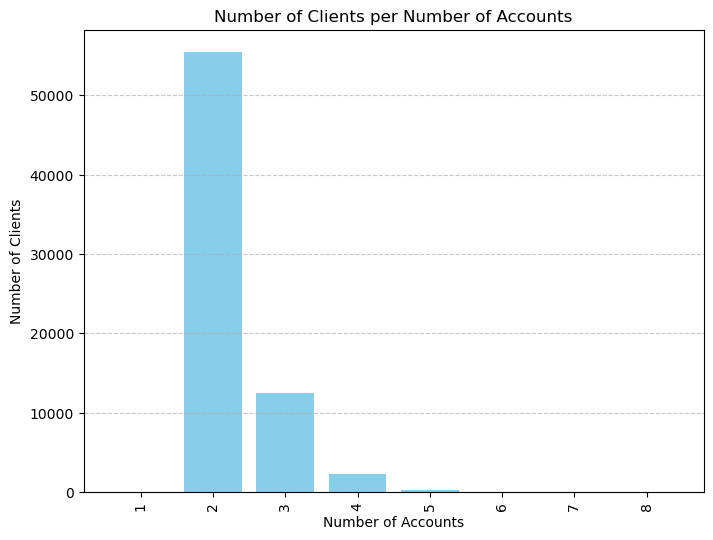

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(result['num_accounts'], result['client_id'], color='skyblue')
plt.xlabel('Number of Accounts')
plt.ylabel('Number of Clients')
plt.title('Number of Clients per Number of Accounts')
plt.xticks(result['num_accounts'], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
#h0 female_years = male_years
#h1 female_years != male_years


female_years = df[df["gender"]=="F"]["client_years"]
male_years = df[df["gender"]=="M"]["client_years"]
female_years, male_years
st.ttest_ind(female_years,male_years, equal_var=False)


TtestResult(statistic=-4.716919101358896, pvalue=2.3955122111882125e-06, df=297648.5266958082)

In [16]:
average_balance_by_gender_process = df.groupby("process_step")["gender"].value_counts()
average_balance_by_gender_process

process_step  gender
confirm       M         21071
              U         20241
              F         19232
start         M         49580
              F         48236
              U         47726
              X             7
step_1        M         32366
              U         32143
              F         31354
              X             6
step_2        U         27780
              M         26291
              F         25479
              X             1
step_3        U         23718
              M         22569
              F         21916
Name: count, dtype: int64

In [17]:
clean_dtypes

<function functions.clean_dtypes(df)>

In [18]:
df.Variation.value_counts()

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [19]:
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449827,449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449828,449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN
449829,449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN


In [20]:
selected_data = df.loc[(df['process_step'] == 'start') & df['Variation'].isna(), ['client_id', 'date_time', "process_step", "Variation"]]
selected_data

,client_id,date_time,process_step,Variation
261846,7775828,2017-03-30 01:28:10,start,NaN
261851,7644910,2017-03-30 00:33:19,start,NaN
261854,5945107,2017-03-30 14:16:28,start,NaN
261861,2212145,2017-04-23 16:27:37,start,NaN
261865,9755145,2017-04-15 14:58:29,start,NaN
...,...,...,...,...
449822,1020453,2017-05-03 12:37:54,start,NaN
449823,3897324,2017-05-04 08:21:30,start,NaN
449824,3897324,2017-05-04 08:21:30,start,NaN
449829,9895983,2017-06-15 19:50:00,start,NaN


In [56]:
steps_df = pd.DataFrame()

steps = ["start", "step_1", "step_2", "step_3", "confirm"]
steps_2 = []

for s in steps:
    for i in range(2):
        steps_2.append(s)
    step_count = df[df["process_step"]==s].groupby(["Variation", "client_id"])["process_step"].count().to_frame()
    step_count = step_count.reset_index().groupby(["Variation"])["process_step"].mean()
    print(f"Step: {s}:{step_count}")
    print(f"Difference: {abs(step_count[0]-step_count[1]).round(3)}\n")
    steps_df = pd.concat([steps_df,step_count.to_frame()])

Step: start:Variation
Control    2.034791
Test       2.116796
Name: process_step, dtype: float64
Difference: 0.082

Step: step_1:Variation
Control    1.472211
Test       1.597560
Name: process_step, dtype: float64
Difference: 0.125

Step: step_2:Variation
Control    1.387989
Test       1.392263
Name: process_step, dtype: float64
Difference: 0.004

Step: step_3:Variation
Control    1.308403
Test       1.240075
Name: process_step, dtype: float64
Difference: 0.068



C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\1762250173.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Difference: {abs(step_count[0]-step_count[1]).round(3)}\n")
C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\1762250173.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Difference: {abs(step_count[0]-step_count[1]).round(3)}\n")
C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\1762250173.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

Step: confirm:Variation
Control    1.134184
Test       1.376465
Name: process_step, dtype: float64
Difference: 0.242



C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\1762250173.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Difference: {abs(step_count[0]-step_count[1]).round(3)}\n")


In [21]:
import pandas as pd

df['time'] = pd.to_datetime(df['date_time'])

filtered_data = df[df['Variation'].isna()]


mean_times = filtered_data.groupby(['client_id', 'process_step'])['time'].mean()
mean_times




client_id  process_step
169        confirm        2017-04-12 20:23:09.000
           start          2017-04-12 20:19:36.000
           step_1         2017-04-12 20:19:45.000
           step_2         2017-04-12 20:20:31.000
           step_3         2017-04-12 20:22:05.000
                                    ...          
9999839    confirm        2017-03-29 12:13:03.000
           start          2017-03-29 12:10:13.500
           step_1         2017-03-29 12:11:35.000
           step_2         2017-03-29 12:11:50.000
           step_3         2017-03-29 12:12:28.000
Name: time, Length: 82971, dtype: datetime64[ns]

In [22]:
value_counts_test = df['Variation'].value_counts()['Test']
value_counts_control = df['Variation'].value_counts()['Control']
#percentages = value_counts / len(df) * 100

value_counts_test, value_counts_control

(177847, 143462)

In [23]:
#result = df.groupby('Variation')['process_step'].value_counts()
#apply(lambda x: (x == 'confirm').mean() * 100)
# Display the result
test_confirmed = df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')]['Variation'].value_counts()
control_confirmed = df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')]['Variation'].value_counts()

test_confirmed, control_confirmed

(Variation
 Test    25722
 Name: count, dtype: int64,
 Variation
 Control    17505
 Name: count, dtype: int64)

In [24]:
value_counts_test = df['Variation'].value_counts()['Test']
value_counts_control = df['Variation'].value_counts()['Control']
test_confirmed = df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')]['Variation'].value_counts()
control_confirmed = df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')]['Variation'].value_counts()
test_confirmed_prc = test_confirmed / value_counts_test * 100
control_confirmed_prc = control_confirmed / value_counts_control * 100
test_confirmed_prc , control_confirmed_prc

(Variation
 Test    14.462993
 Name: count, dtype: float64,
 Variation
 Control    12.201837
 Name: count, dtype: float64)

In [25]:
test_clients = df[df['Variation'] == 'Test']['client_id'].nunique()
control_clients = df[df['Variation'] == 'Control']['client_id'].nunique()

test_confirmed_clients = df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')]['client_id'].nunique()
control_confirmed_clients = df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')]['client_id'].nunique()

test_confirmed_prc = (test_confirmed_clients / test_clients * 100)
control_confirmed_prc = (control_confirmed_clients / control_clients * 100)

test_confirmed_prc, control_confirmed_prc



(69.29323642835953, 65.58728539860616)

In [26]:
test_confirmed_clients

18687

In [27]:
df.isnull().sum()

Unnamed: 0             0
client_id              0
visitor_id             0
visit_id               0
process_step           0
date_time              0
client_years         115
client_month         115
client_age           127
gender               115
num_accounts         115
balance              115
calls_6_months       115
logins_6             115
Variation         128522
time                   0
dtype: int64

In [28]:
female_years = df[df["gender"]=="F"]["client_years"].mean()
male_years = df[df["gender"]=="M"]["client_years"].mean()
female_years , male_years

(14.96771921185635, 15.08150674559018)

In [29]:
female_years = df[df["gender"]=="F"]["client_years"]
male_years = df[df["gender"]=="M"]["client_years"]
female_years, male_years

(42        11.0
 43        11.0
 44        11.0
 45        11.0
 46        11.0
           ... 
 449813    14.0
 449814    14.0
 449815    14.0
 449816    14.0
 449817    14.0
 Name: client_years, Length: 146217, dtype: float64,
 15        22.0
 16        22.0
 17        22.0
 18        22.0
 19        22.0
           ... 
 449826    10.0
 449827    10.0
 449828    10.0
 449829    10.0
 449830    10.0
 Name: client_years, Length: 151877, dtype: float64)

In [30]:
st.ttest_ind(male_years,female_years, equal_var=False)

TtestResult(statistic=4.716919101358896, pvalue=2.3955122111882125e-06, df=297648.5266958082)

In [31]:
crosstab_result = pd.crosstab(df['client_years'], df['gender'])

crosstab_result

gender,F,M,U,X
client_years,,,,
2.0,31,58,414,0
3.0,470,401,2150,0
4.0,2762,2529,23665,0
5.0,5330,5163,33628,0
6.0,3557,3465,37355,0
7.0,1359,1792,28196,0
8.0,6027,6282,12758,0
9.0,9805,10211,1032,9
10.0,8243,8584,772,0


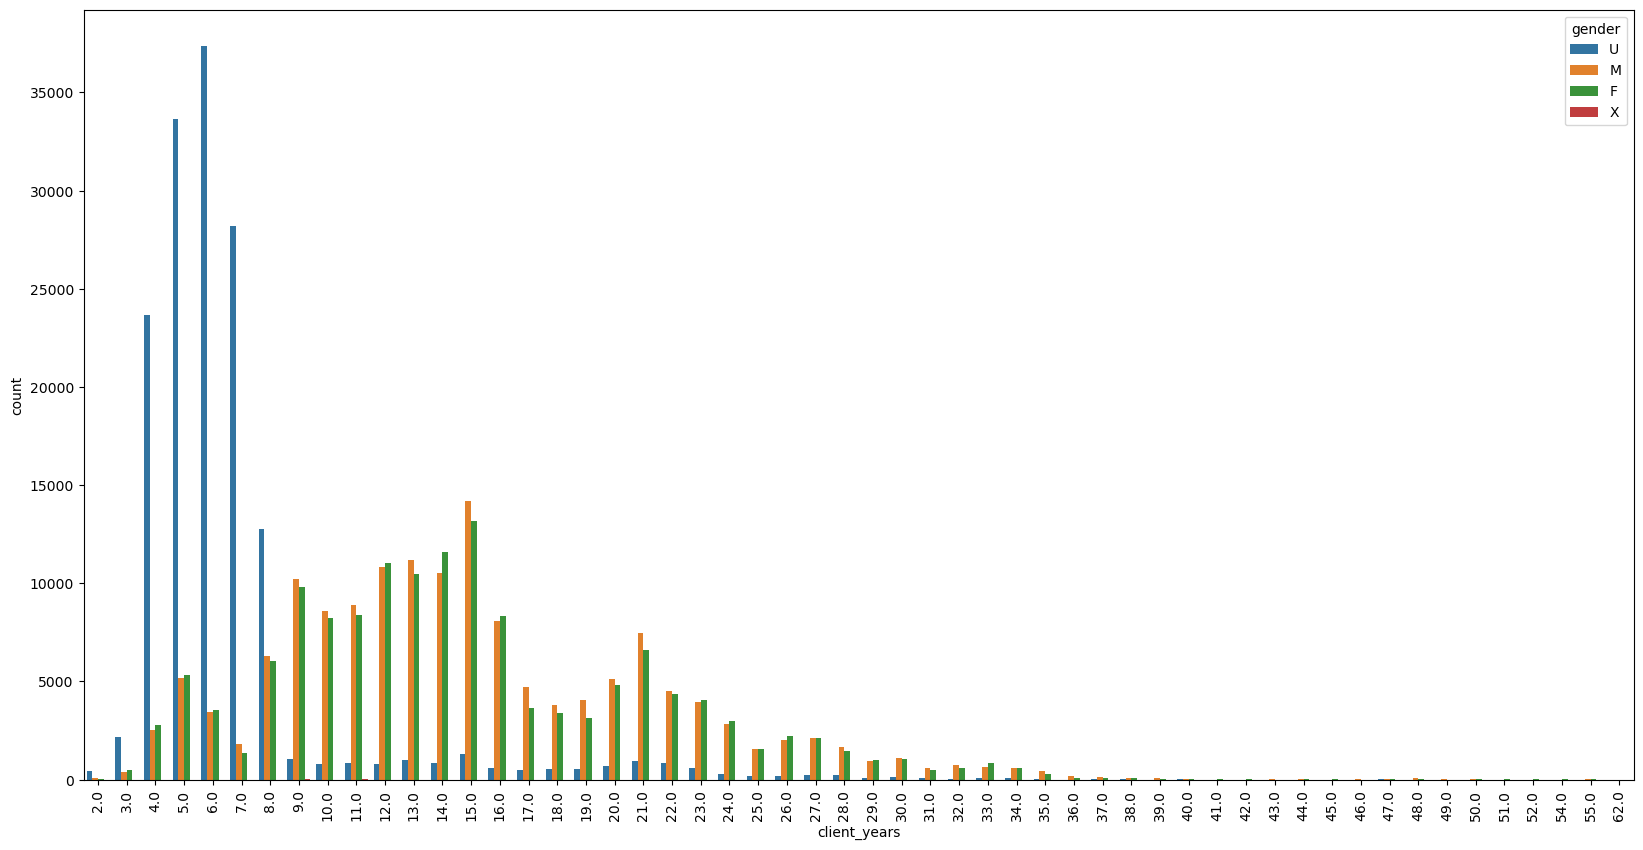

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size before creating the plot
plt.figure(figsize=(20, 10))

# Your code to create the countplot
sns.countplot(data=df, x='client_years', hue='gender')

# Rotating the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [33]:
clients_years_table = pd.crosstab(index = df["client_years"],  
                              columns="count")      
clients_years_table

col_0,count
client_years,
2.0,503
3.0,3021
4.0,28956
5.0,44121
6.0,44377
7.0,31347
8.0,25067
9.0,21057
10.0,17599


<Axes: xlabel='client_years', ylabel='balance'>

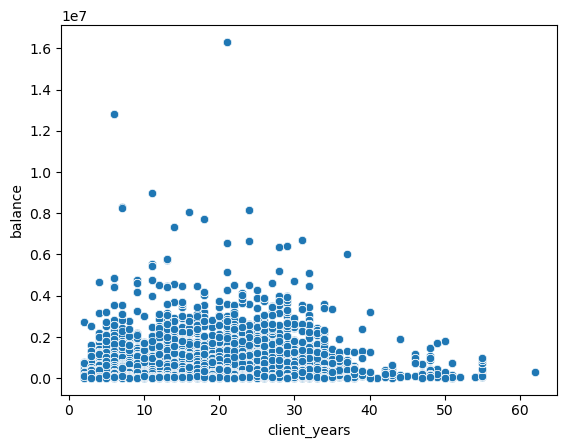

In [34]:
sns.scatterplot(data=df, x='client_years', y='balance')

In [35]:
age_bins = [0,5,10,15,20,25,30, 35,40,45,50,55,62]
age_labels = ['0-5','5-10','10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55','55-62' ]


years_group_counts= pd.cut(df["client_years"], bins=age_bins, labels=age_labels, right=False).value_counts().sort_index()


years_group_counts

client_years
0-5       32480
5-10     165969
10-15    104005
15-20     69989
20-25     50070
25-30     17572
30-35      7588
35-40      1517
40-45       152
45-50       187
50-55       133
55-62        52
Name: count, dtype: int64

In [36]:
df['client_years'] = pd.cut(df['client_years'], bins=age_bins, labels=age_labels, right=False)

# Count occurrences in each age group
years_group_counts = df['client_years'].value_counts().sort_index()

# Group by age group and gender, and count occurrences
gender_counts = df.groupby(['client_years', 'gender']).size().unstack(fill_value=0)

print("Counts per age group:")
print(years_group_counts)
print("\nGender counts per age group:")
print(gender_counts)

Counts per age group:
client_years
0-5       32480
5-10     165969
10-15    104005
15-20     69989
20-25     50070
25-30     17572
30-35      7588
35-40      1517
40-45       152
45-50       187
50-55       133
55-62        52
Name: count, dtype: int64

Gender counts per age group:
gender            F      M       U  X
client_years                         
0-5            3263   2988   26229  0
5-10          26078  26913  112969  9
10-15         49701  50020    4279  5
15-20         31717  34832    3440  0
20-25         22822  23910    3338  0
25-30          8331   8349     892  0
30-35          3486   3709     393  0
35-40           567    905      45  0
40-45            55     82      15  0
45-50            57    125       5  0
50-55           112     21       0  0
55-62            26     23       3  0


C:\Users\zaiid\AppData\Local\Temp\ipykernel_5288\18563598.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby(['client_years', 'gender']).size().unstack(fill_value=0)


In [37]:
gender_table = pd.crosstab(index = df["gender"],  
                              columns="count")      
gender_table

col_0,count
gender,
F,146217
M,151877
U,151608
X,14


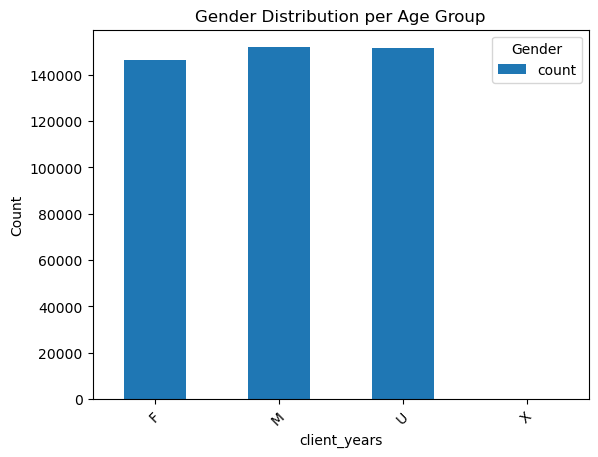

In [38]:
gender_table.plot(kind='bar', stacked=False)
plt.title('Gender Distribution per Age Group')
plt.xlabel('client_years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [39]:
crosstab_result = pd.crosstab(df['gender'], df['client_years'])

crosstab_result

client_years,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-62
gender,,,,,,,,,,,,
F,3263,26078,49701,31717,22822,8331,3486,567,55,57,112,26
M,2988,26913,50020,34832,23910,8349,3709,905,82,125,21,23
U,26229,112969,4279,3440,3338,892,393,45,15,5,0,3
X,0,9,5,0,0,0,0,0,0,0,0,0


<Axes: xlabel='client_years', ylabel='gender'>

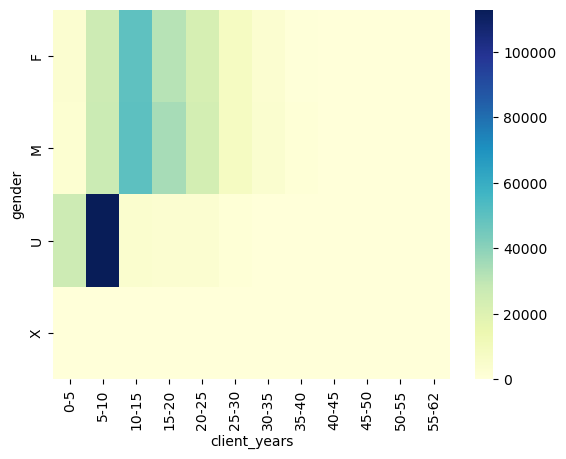

In [40]:
sns.heatmap(crosstab_result, cmap="YlGnBu", fmt="d")

In [41]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(213388.64536215298, 0.0)

In [42]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.3977011272674973

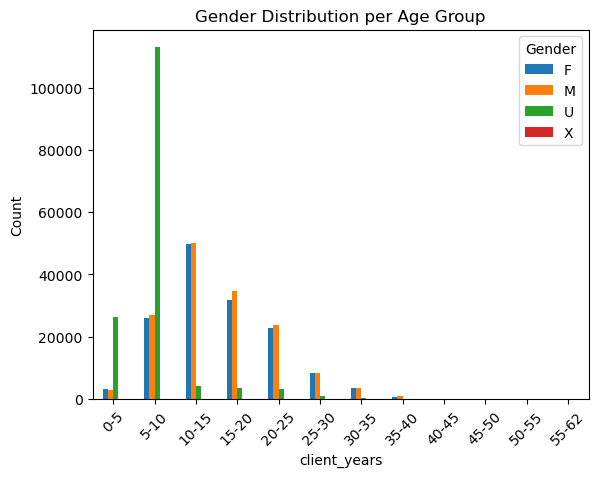

In [43]:
gender_counts.plot(kind='bar', stacked=False)
plt.title('Gender Distribution per Age Group')
plt.xlabel('client_years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [44]:
client_age_table = pd.crosstab(index = df["client_age"],  
                              columns="count",)      
client_age_table

col_0,count
client_age,
13.5,9
14.0,10
14.5,161
15.0,106
15.5,268
...,...
93.5,32
94.0,25
94.5,5


In [45]:
client_age_table/client_age_table.sum()

col_0,count
client_age,
13.5,0.000020
14.0,0.000022
14.5,0.000358
15.0,0.000236
15.5,0.000596
...,...
93.5,0.000071
94.0,0.000056
94.5,0.000011


In [46]:
client_month_table = pd.crosstab(index = df["client_month"],  
                              columns="count",)      
client_month_table

col_0,count
client_month,
33.0,98
34.0,201
35.0,204
36.0,149
37.0,207
...,...
661.0,5
667.0,10
668.0,22


In [47]:

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


age_group_counts= pd.cut(df["client_age"], bins=age_bins, labels=age_labels, right=False).value_counts().sort_index()


age_group_counts


client_age
0-10           0
10-20       7530
20-30      71290
30-40      76050
40-50      76049
50-60     103890
60-70      83791
70-80      25620
80-90       5141
90-100       343
Name: count, dtype: int64

In [48]:
total_entries = df.shape[0]
age_group_percentages = (age_group_counts / total_entries) * 100

age_group_percentages.round(2)

client_age
0-10       0.00
10-20      1.67
20-30     15.85
30-40     16.91
40-50     16.91
50-60     23.10
60-70     18.63
70-80      5.70
80-90      1.14
90-100     0.08
Name: count, dtype: float64

C:\Users\zaiid\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


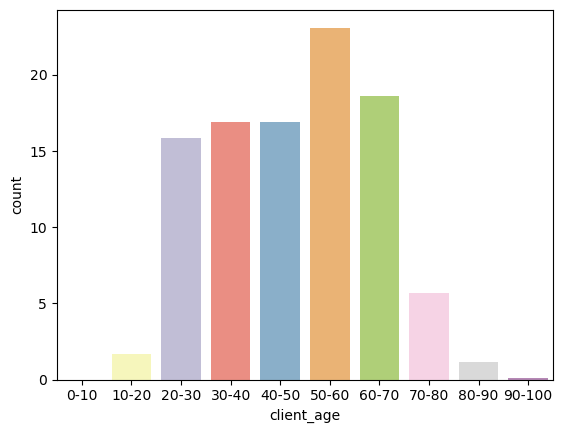

In [49]:
sns.barplot(x=age_group_percentages.round(2).index, y=age_group_percentages.round(2), palette="Set3");

In [50]:
df.client_age.describe()

count    449704.000000
mean         47.653966
std          15.742089
min          13.500000
25%          33.500000
50%          49.000000
75%          60.000000
max          96.000000
Name: client_age, dtype: float64

In [51]:
#h0 males_balance = women_balance 
#h1 males_balance != women_balance

In [52]:
female_balance = df[df["gender"]=="F"]["balance"]
male_balance = df[df["gender"]=="M"]["balance"]
female_balance, male_balance

(42        46131.19
 43        46131.19
 44        46131.19
 45        46131.19
 46        46131.19
             ...   
 449813    37161.12
 449814    37161.12
 449815    37161.12
 449816    37161.12
 449817    37161.12
 Name: balance, Length: 146217, dtype: float64,
 15        36001.90
 16        36001.90
 17        36001.90
 18        36001.90
 19        36001.90
             ...   
 449826    97748.22
 449827    97748.22
 449828    97748.22
 449829    97748.22
 449830    97748.22
 Name: balance, Length: 151877, dtype: float64)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
st.ttest_ind(male_balance,female_balance, equal_var=False)

TtestResult(statistic=63.33614024282363, pvalue=0.0, df=226378.36166749787)

In [54]:
female_years = df[df["gender"]=="F"]["client_years"].count
male_years = df[df["gender"]=="M"]["client_years"].count
female_years, male_years

(<bound method Series.count of 42        10-15
 43        10-15
 44        10-15
 45        10-15
 46        10-15
           ...  
 449813    10-15
 449814    10-15
 449815    10-15
 449816    10-15
 449817    10-15
 Name: client_years, Length: 146217, dtype: category
 Categories (12, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '40-45' < '45-50' < '50-55' < '55-62']>,
 <bound method Series.count of 15        20-25
 16        20-25
 17        20-25
 18        20-25
 19        20-25
           ...  
 449826    10-15
 449827    10-15
 449828    10-15
 449829    10-15
 449830    10-15
 Name: client_years, Length: 151877, dtype: category
 Categories (12, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '40-45' < '45-50' < '50-55' < '55-62']>)

In [75]:
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation,time,confirm_step,age_group_bin
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:27:07,0,71-80
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:26:51,0,71-80
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:19:22,0,71-80
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:19:13,0,71-80
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:18:04,0,71-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:52:09,0,41-50
449827,449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:37,0,41-50
449828,449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:05,0,41-50
449829,449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:00,0,41-50


In [76]:
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,client_years,client_month,client_age,gender,num_accounts,balance,calls_6_months,logins_6,Variation,time,confirm_step,age_group_bin
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:27:07,0,71-80
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:26:51,0,71-80
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:19:22,0,71-80
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:19:13,0,71-80
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5-10,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test,2017-04-17 15:18:04,0,71-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:52:09,0,41-50
449827,449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:37,0,41-50
449828,449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:05,0,41-50
449829,449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,10-15,121.0,49.0,M,2.0,97748.22,2.0,2.0,NaN,2017-06-15 19:50:00,0,41-50
